In [2]:
import cv2
from matplotlib import pyplot
import numpy

# Ustawienie rozmarów wyświetlanych obrazów
pyplot.rcParams["figure.figsize"] = (18, 10)

In [3]:
#
# Wczytanie obrazów źródłowych
#
# źródło grafiki colors.jpg: https://unsplash.com/photos/gT5kuls6Y6Q
# źródło grafiki gacław-na-kuchni.jpg: własne
#
#image_from_file = cv2.imread('images/colors.jpg')
image_from_file = cv2.imread('images/gacław-na-kuchni.jpg')
image_gray = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2GRAY)
image_color = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB)
print('Rozmiar obrazka: ', image_from_file.shape)

Rozmiar obrazka:  (768, 1024, 3)


# Zadanie 1

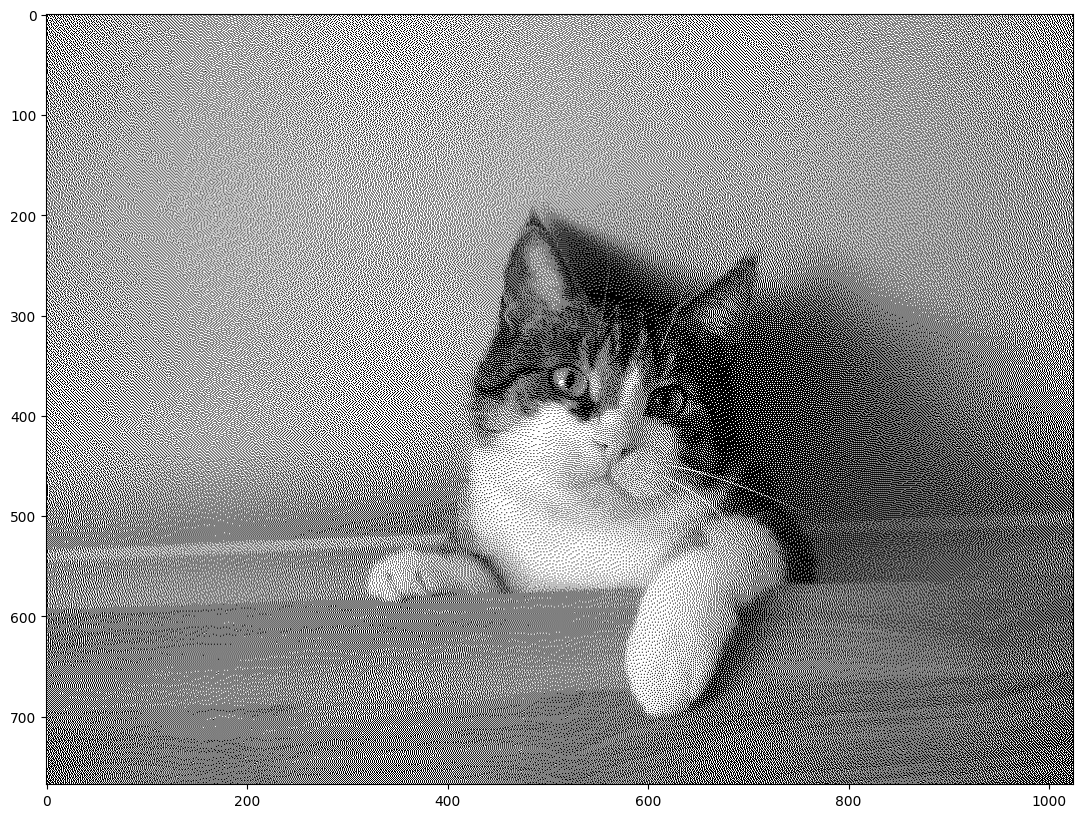

In [4]:


output = numpy.copy(image_gray).astype(numpy.int16)

#
# Algorytm Floyd-Steinberga
#


height, width = output.shape[:2]
for y in range(0, height):
    for x in range(0, width):
        old_value = output[y, x]
        new_value = round(old_value / 255) * 255
        output[y, x] = new_value

        error = old_value - new_value
        if (x < width-1):
            output[y, x+1] += error * 7 / 16

        if (x > 0 and y< height-1):
            output[y+1, x-1] +=  error * 3 / 16

        if (y<height-1):
            output[y+1, x] +=  error * 5 / 16

        if (y<height-1 and x<width-1):
            output[y+1, x+1] +=  error * 1 / 16

output = output.astype(numpy.uint8)



pyplot.imshow(output, cmap='gray')

Text(0, 0.5, 'Liczba pikseli obrazu []')

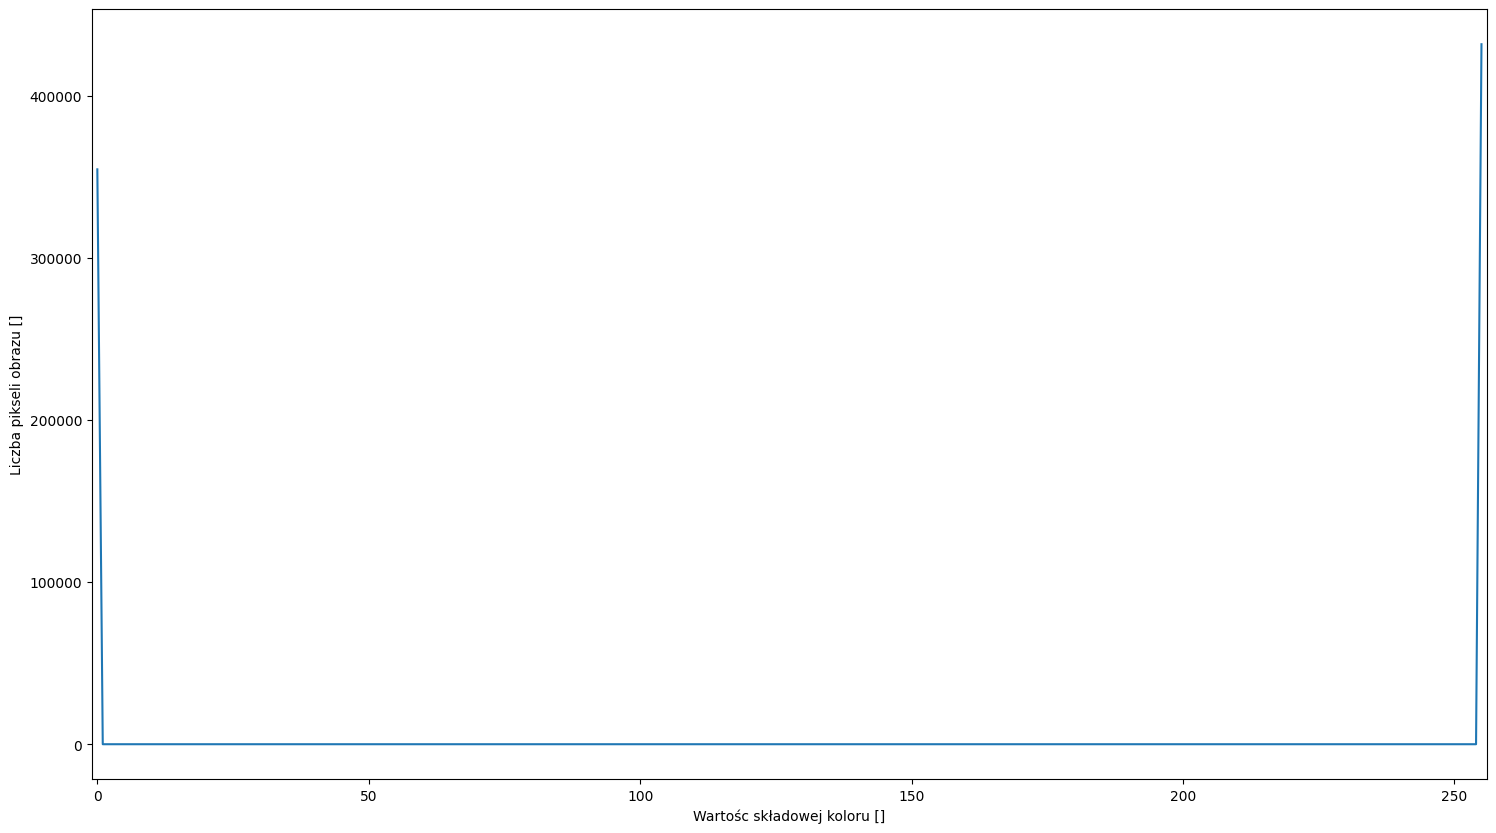

In [5]:
#
# Histogram
#
histr = cv2.calcHist([output], [0], None, [256], [0, 256])
pyplot.plot(histr)
pyplot.xlim([-1, 256])
pyplot.xlabel('Wartośc składowej koloru []')
pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 2

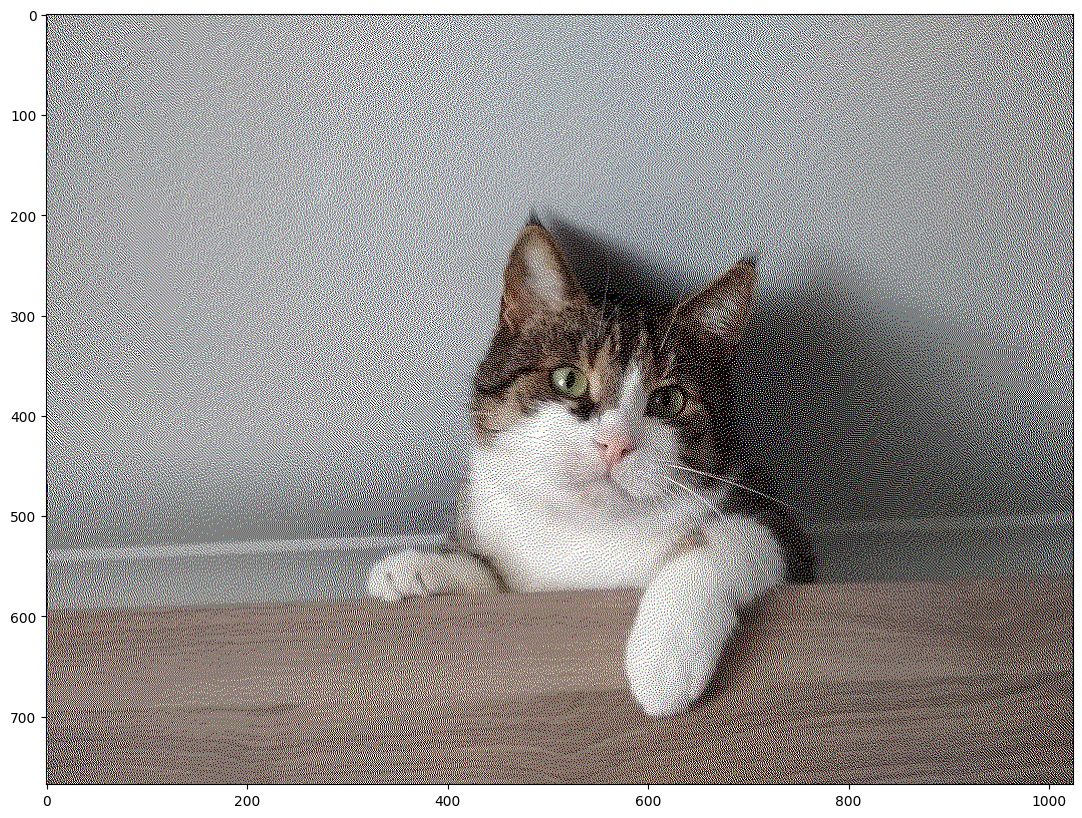

In [6]:
output = numpy.copy(image_color).astype(numpy.int16)

k = 2

height, width = output.shape[:2]
for y in range(0, height):
    for x in range(0, width):
        red_old_value, green_old_value, blue_old_value = output[y, x]

        red_new_value = round((k - 1) * red_old_value / 255) * 255 / (k - 1)
        green_new_value = round((k - 1) * green_old_value / 255) * 255 / (k - 1)
        blue_new_value = round((k - 1) * blue_old_value / 255) * 255 / (k - 1)

        output[y, x] = red_new_value, green_new_value, blue_new_value

        red_error = red_old_value - red_new_value
        green_error = green_old_value - green_new_value
        blue_error = blue_old_value - blue_new_value

        if (x < width-1):
            output[y, x+1] = output[y, x+1] + (red_error * 7 / 16, green_error * 7 / 16, blue_error * 7 / 16)

        if (x > 0 and y< height-1):
            output[y+1, x-1] = output[y+1, x-1] + (red_error * 3 / 16, green_error * 3 / 16, blue_error * 3 / 16)

        if (y<height-1):
            output[y+1, x] = output[y+1, x] + (red_error * 5 / 16, green_error * 5 / 16, blue_error * 5 / 16)

        if (y<height-1 and x<width-1):
            output[y+1, x+1] = output[y+1, x+1] + (red_error * 1 / 16, green_error * 1 / 16, blue_error * 1 / 16)

output = output.astype(numpy.uint8)



pyplot.imshow(output, cmap='gray')
#
# Wyświetlenie
#
pyplot.imshow(output)

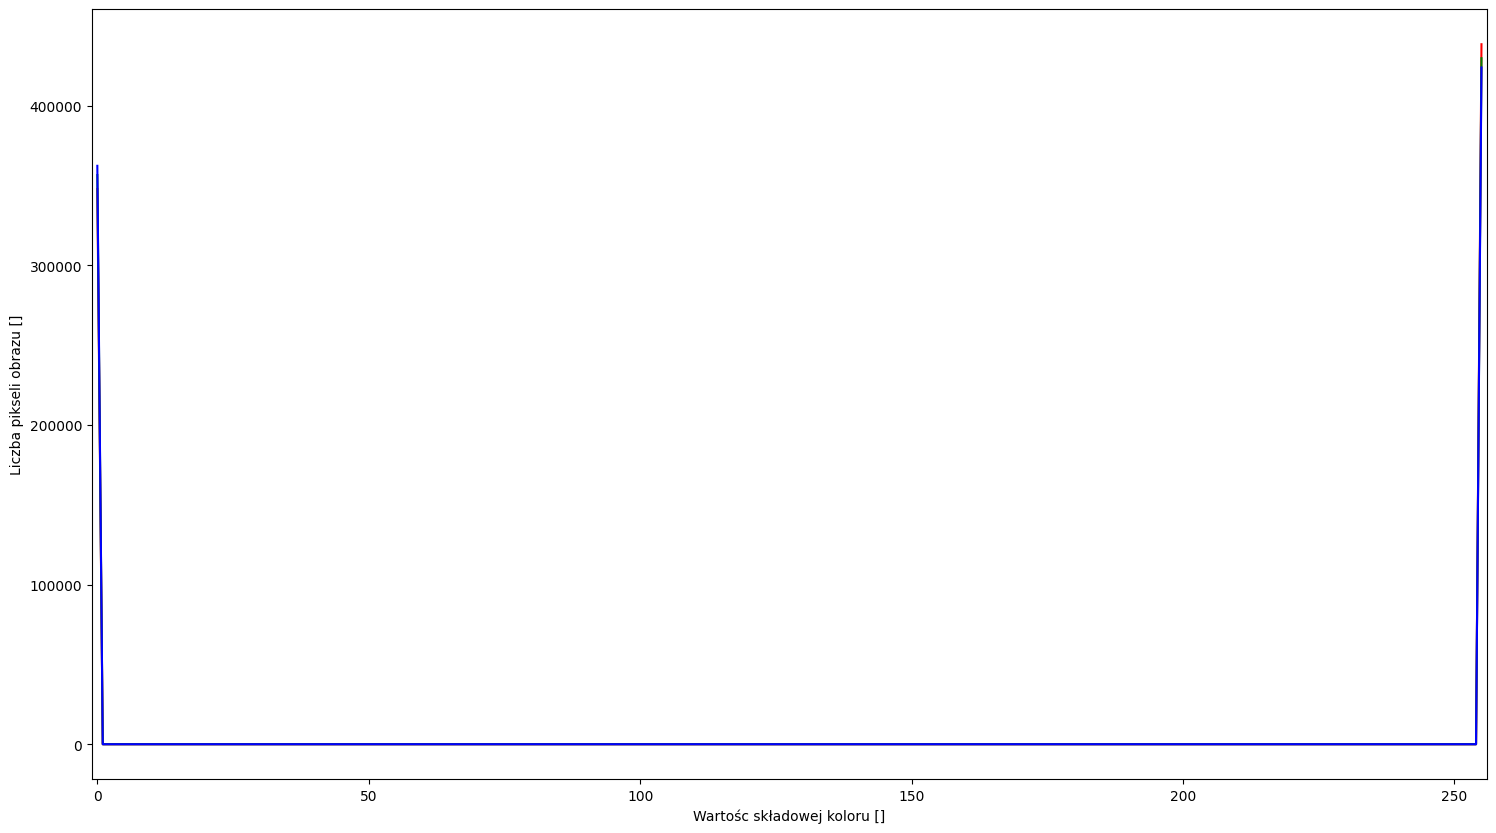

In [7]:
#
# Histogram
#
color = ('r', 'g', 'b')

for i, col in enumerate(color):
    histr = cv2.calcHist([output], [i], None, [256], [0, 256])
    pyplot.plot(histr, color=col)
    pyplot.xlim([-1, 256])
    pyplot.xlabel('Wartośc składowej koloru []')
    pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 3

0 1


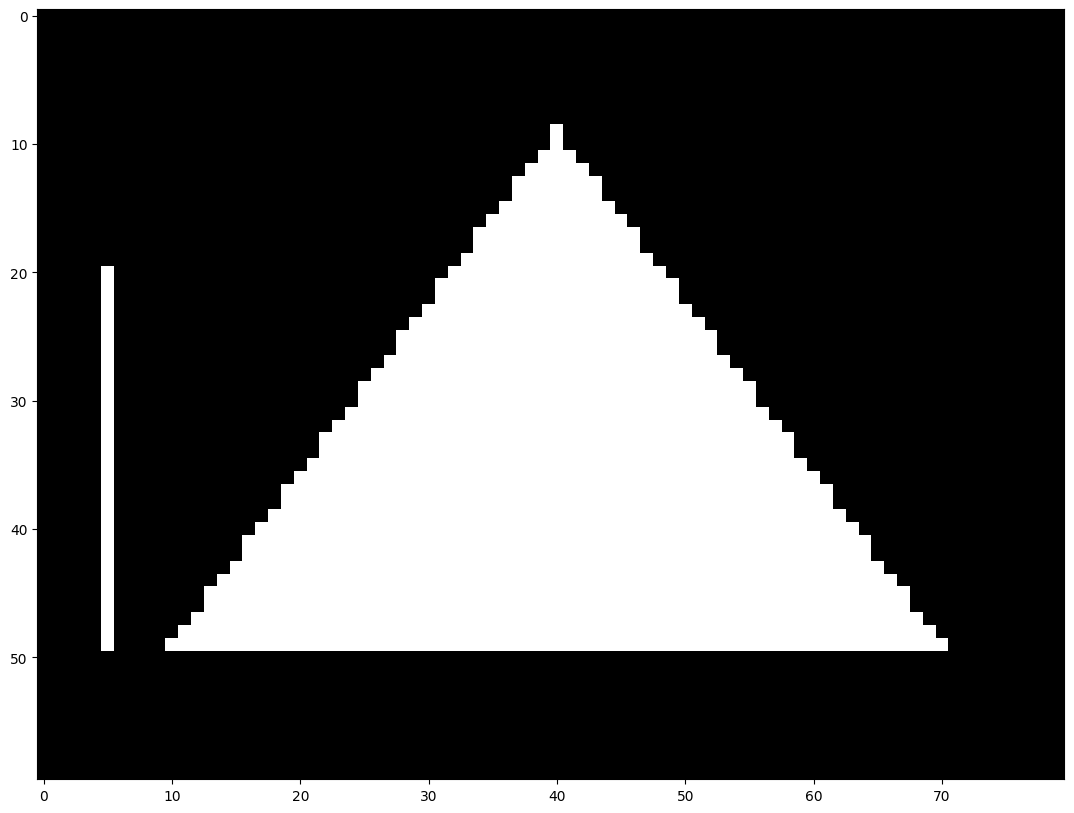

In [8]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię algorytmem Bresenhama
#
def draw_line(image, x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    xi = numpy.sign(x2 - x1)
    yi = numpy.sign(y2 - y1)

    print(xi, yi)

    x, y = x1, y1

    if dx > dy:
        d = 2 * dy - dx
    elif dx < dy:
        d = 2 * dx - dy
    
    while x != x2 or y != y2:
        draw_point(image, x, y)

        if dx > dy:
            if x != x2:
                x += xi
                d += 2 * dy
            if d >= 0:
                if y != y2:
                    y += yi
                    d -= 2 * dx
        else:
            if y != y2:
                y += yi
                d += 2 * dx
            if d >= 0:
                if x != x2:
                    x += xi
                    d -= 2 * dy


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    xmin = min(a[0], b[0], c[0])
    xmax = max(a[0], b[0], c[0])
    ymin = min(a[1], b[1], c[1])
    ymax = max(a[1], b[1], c[1])

        # Test punktu w trójkącie dla każdego punktu w bounding boxie
    for x in range(xmin, xmax + 1):
        for y in range(ymin, ymax + 1):
            P = (x, y)
            # Sprawdzenie czy punkt leży wewnątrz trójkąta
            if point_in_triangle(P, a, b, c):
                draw_point(image, x, y)


def point_in_triangle(P, A, B, C):
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    b1 = sign(P, A, B) < 0.0
    b2 = sign(P, B, C) < 0.0
    b3 = sign(P, C, A) < 0.0

    return b1 == b2 == b3
#
# Rysowanie
#
draw_line(image, 5, 10, 5, 40)

draw_triangle(image, (10, 10), (70, 10), (40, 50))
#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 4

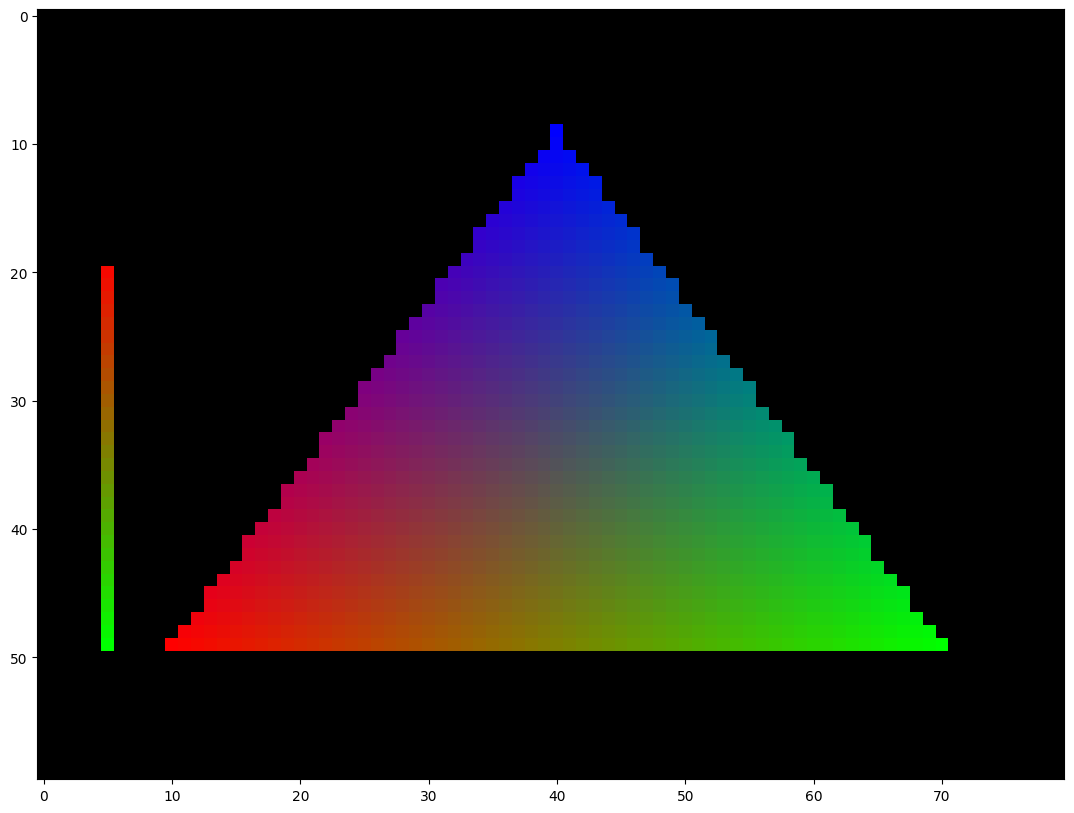

In [69]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    xi = numpy.sign(x2 - x1)
    yi = numpy.sign(y2 - y1)

    x, y = x1, y1

    if dx > dy:
        d = 2 * dy - dx
    elif dx < dy:
        d = 2 * dx - dy
    
    points = []

    while x != x2 or y != y2:
        points.append((x, y))

        if dx > dy:
            if x != x2:
                x += xi
                d += 2 * dy
            if d >= 0:
                if y != y2:
                    y += yi
                    d -= 2 * dx
        else:
            if y != y2:
                y += yi
                d += 2 * dx
            if d >= 0:
                if x != x2:
                    x += xi
                    d -= 2 * dy

    
    length = len(points)
    for i, point in enumerate(points):
        t = i / length
        color = (int(255 * t), int(255 * (1 - t)), 0)
        draw_point(image, *point, color)



#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    xmin = min(a[0], b[0], c[0])
    xmax = max(a[0], b[0], c[0])
    ymin = min(a[1], b[1], c[1])
    ymax = max(a[1], b[1], c[1])
    
    for x in range(xmin, xmax + 1):
        for y in range(ymin, ymax + 1):
            P = (x, y)
            λ = area(a, b, c)
            λ0 = area(b, c, P)
            λ1 = area(c, a, P)
            λ2 = area(a, b, P)

            color = (int(255 * λ0 / λ), int(255 * λ1 / λ), int(255 * λ2 / λ))
    
            # Sprawdzenie czy punkt leży wewnątrz trójkąta
            if point_in_triangle(P, a, b, c):
                draw_point(image, x, y, color)

def area(A, B, C):
    return abs((B[0] - A[0]) * (C[1] - A[1]) - (C[0] - A[0]) * (B[1] - A[1]))

#
# Rysowanie
#

draw_line(image, 5, 10, 5, 40)

draw_triangle(image, (10, 10), (70, 10), (40, 50))

#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 5

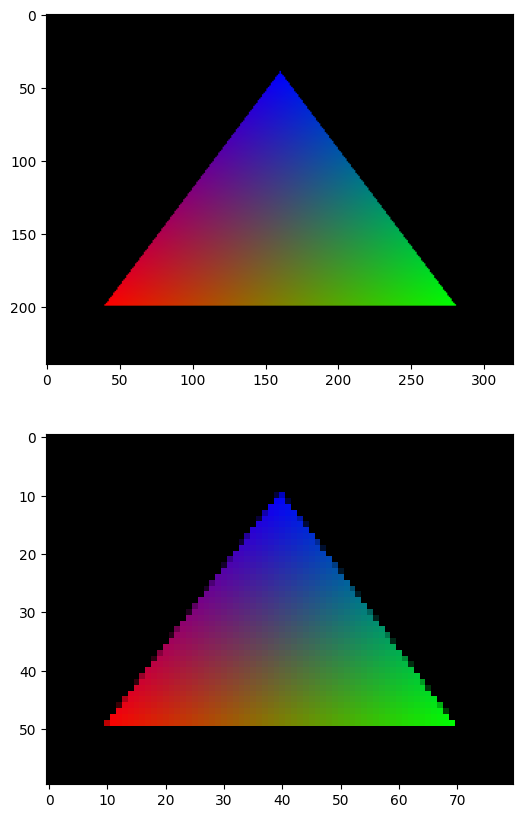

In [65]:
#
# Przygotowanie płótna
#
scale = 2
width = 160 * scale
height = 120 * scale
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    xi = numpy.sign(x2 - x1)
    yi = numpy.sign(y2 - y1)

    x, y = x1, y1

    if dx > dy:
        d = 2 * dy - dx
    elif dx < dy:
        d = 2 * dx - dy
    
    points = []

    while x != x2 or y != y2:
        points.append((x, y))

        if dx > dy:
            if x != x2:
                x += xi
                d += 2 * dy
            if d >= 0:
                if y != y2:
                    y += yi
                    d -= 2 * dx
        else:
            if y != y2:
                y += yi
                d += 2 * dx
            if d >= 0:
                if x != x2:
                    x += xi
                    d -= 2 * dy

    
    length = len(points)
    for i, point in enumerate(points):
        t = i / length
        color = (int(255 * t), int(255 * (1 - t)), 0)
        draw_point(image, *point, color)


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    xmin = min(a[0], b[0], c[0])
    xmax = max(a[0], b[0], c[0])
    ymin = min(a[1], b[1], c[1])
    ymax = max(a[1], b[1], c[1])
    
    for x in range(xmin, xmax + 1):
        for y in range(ymin, ymax + 1):
            P = (x, y)
            λ = area(a, b, c)
            λ0 = area(b, c, P)
            λ1 = area(c, a, P)
            λ2 = area(a, b, P)

            color = (int(255 * λ0 / λ), int(255 * λ1 / λ), int(255 * λ2 / λ))
    
            if point_in_triangle(P, a, b, c):
                draw_point(image, x, y, color)

def area(A, B, C):
    return abs((B[0] - A[0]) * (C[1] - A[1]) - (C[0] - A[0]) * (B[1] - A[1]))

#
# Rysowanie
#


draw_triangle(image, (20 * scale, 20 * scale), (140 * scale, 20 * scale), (80 * scale, 100 * scale))



#
# Przeskalowanie obrazu roboczego w dół
#
scaled_image = cv2.resize(image, (80, 60))


fig, ax = pyplot.subplots(2)

ax[0].imshow(image)
ax[1].imshow(scaled_image)
